In [1]:
#import modules 
import numpy as np #for linear algebra
import pandas as pd # a data processing library
import warnings # to supress the warnings
warnings.filterwarnings('ignore')
# data visulation  
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(style='white',color_codes=True)

# Data Preparation

In [2]:
# load the iris dataset
iris =pd.read_csv('iris.csv')

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# to check the count of each Species 
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
# to check if there is any duplicates in the dataset
iris.duplicated().sum()

0

In [6]:
iris.shape

(150, 6)

In [7]:
iris.info() #to check the column basic attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


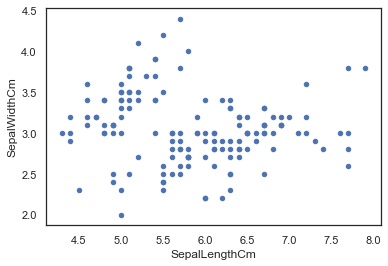

In [8]:
#Scatter plot
iris.plot(kind='scatter',x ='SepalLengthCm',y='SepalWidthCm')

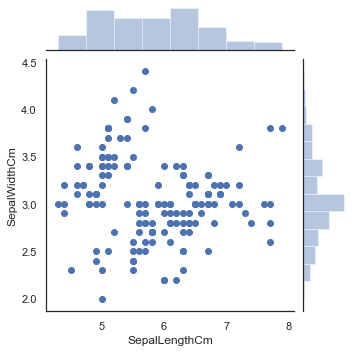

In [9]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,height=5)

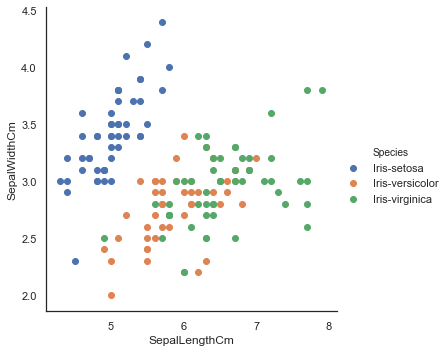

In [10]:
sns.FacetGrid(iris,hue='Species',height=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

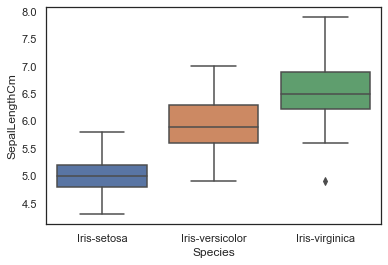

In [11]:
# box plot
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)

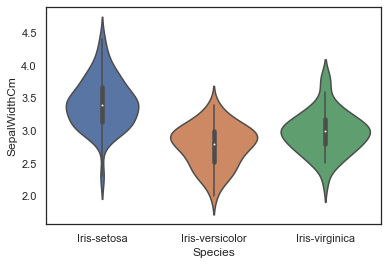

In [12]:
# violin plot 
sns.violinplot(data=iris,x='Species',y='SepalWidthCm')

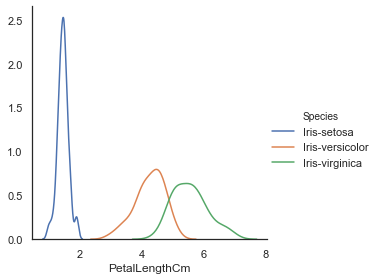

In [13]:
# kde plot
sns.FacetGrid(iris,hue='Species',height=4)\
.map(sns.kdeplot,"PetalLengthCm")\
.add_legend()

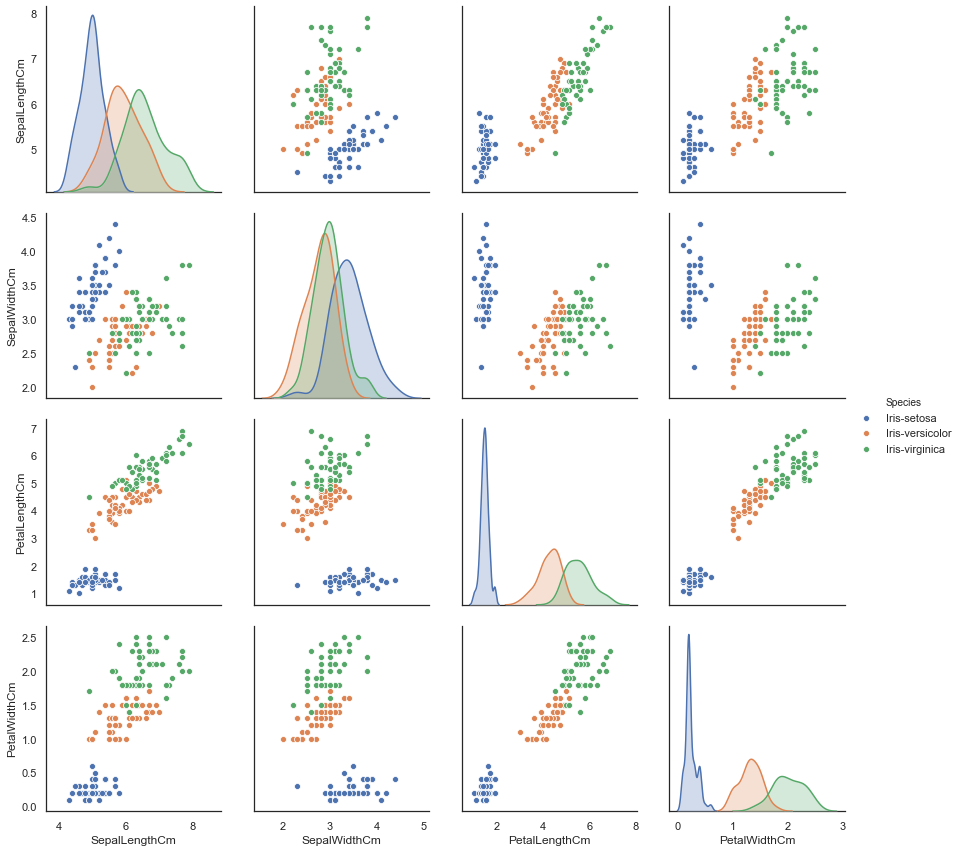

In [14]:
# this pair plot is used to plot every combination in the dataset
sns.pairplot(iris.drop('Id',axis=1),hue='Species',height=3,diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0B27B2C08>,
      dtype=object)

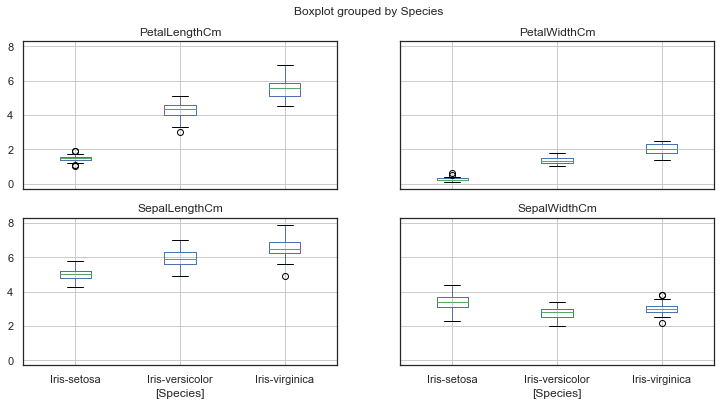

In [15]:
iris.drop('Id',axis = 1).boxplot(by='Species',figsize=(12,6))

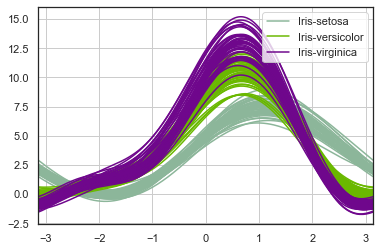

In [16]:
# even pandas module supports data visulation
from pandas.plotting import andrews_curves
andrews_curves(iris.drop('Id',axis =1),'Species')

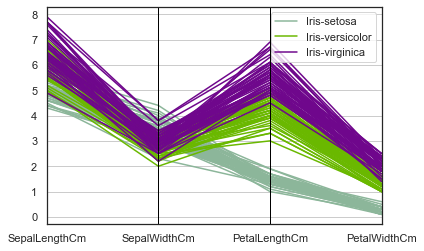

In [17]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop('Id',axis=1),'Species')

# Machine Learning

In [18]:
# importing module which is requrired for machine learning
# most of the algorithms are present under sklearn module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

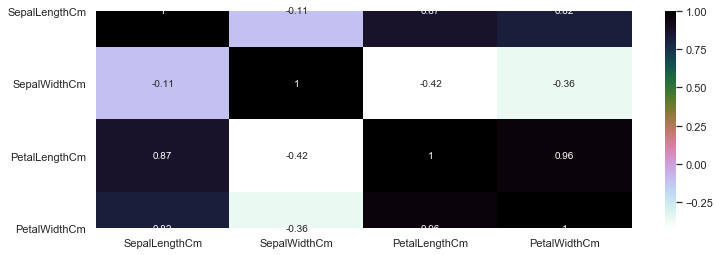

In [19]:
# we use heatmap to check the correlation between the elements in the dataset 
# so our model can have properly trained
plt.figure(figsize=(12,4))
del iris['Id']
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [20]:
# Spliting the dataset for train and test 
train,test = train_test_split(iris,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [21]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = train.Species


In [22]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
116,6.5,3.0,5.5,1.8
83,6.0,2.7,5.1,1.6
43,5.0,3.5,1.6,0.6
110,6.5,3.2,5.1,2.0


In [23]:
train_y.head()

58     Iris-versicolor
116     Iris-virginica
83     Iris-versicolor
43         Iris-setosa
110     Iris-virginica
Name: Species, dtype: object

# Support Vector Machine(SVM)

In [24]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
# to check the accuarcy of the model
print('The accuracy of SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of SVM is: 0.9904761904761905


#  Logisitic Regression

In [25]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of LogisticRegression is:',metrics.accuracy_score(prediction,test_y))

The accuracy of LogisticRegression is: 0.9523809523809523


# Decision Tree

In [26]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of DecisionTreeClassifier is:',metrics.accuracy_score(prediction,test_y))

The accuracy of DecisionTreeClassifier is: 1.0
